Practical No 04 


Recurrent neural network (RNN) Use the Google stock prices dataset and design a time seriesanalysis and prediction system using RNN.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [23]:
data_train=pd.read_csv('Google_Stock_Price_Train.csv')
data_train


,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"
...,...,...,...,...,...,...
1253,12/23/2016,790.90,792.74,787.28,789.91,"623,400"
1254,12/27/2016,790.68,797.86,787.66,791.55,"789,100"
1255,12/28/2016,793.70,794.23,783.20,785.05,"1,153,800"
1256,12/29/2016,783.33,785.93,778.92,782.79,"744,300"


In [25]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1258 non-null   object 
 1   Open    1258 non-null   float64
 2   High    1258 non-null   float64
 3   Low     1258 non-null   float64
 4   Close   1258 non-null   object 
 5   Volume  1258 non-null   object 
dtypes: float64(3), object(3)
memory usage: 59.1+ KB


In [26]:
train = data_train.loc[:,["Open"]].values
print(train)

[[325.25]
 [331.27]
 [329.83]
 ...
 [793.7 ]
 [783.33]
 [782.75]]


In [27]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

train_scaled = scaler.fit_transform(train)
print(train_scaled)

[[0.08581368]
 [0.09701243]
 [0.09433366]
 ...
 [0.95725128]
 [0.93796041]
 [0.93688146]]


In [28]:
# create a data structure with 50 timesteps and 1 output

x_train = []
y_train = []
timesteps = 5

for i in range(timesteps, 1258):
    x_train.append(train_scaled[i - timesteps:i, 0])
    y_train.append(train_scaled[i, 0])
x_train, y_train = np.array(x_train), np.array(y_train)

In [29]:
# Reshaping

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
print(x_train)
print(y_train)

[[[0.08581368]
  [0.09701243]
  [0.09433366]
  [0.09156187]
  [0.07984225]]

 [[0.09701243]
  [0.09433366]
  [0.09156187]
  [0.07984225]
  [0.0643277 ]]

 [[0.09433366]
  [0.09156187]
  [0.07984225]
  [0.0643277 ]
  [0.0585423 ]]

 ...

 [[0.96294367]
  [0.96123223]
  [0.95475854]
  [0.95204256]
  [0.95163331]]

 [[0.96123223]
  [0.95475854]
  [0.95204256]
  [0.95163331]
  [0.95725128]]

 [[0.95475854]
  [0.95204256]
  [0.95163331]
  [0.95725128]
  [0.93796041]]]
[0.0643277  0.0585423  0.06568569 ... 0.95725128 0.93796041 0.93688146]


Create RNN Model

In [30]:
# Create RNN Model

# Importing the Keras Libraries and packages
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN, Dropout

# initialisinig the RNN
regressor = Sequential()

# adding the first RNN layer and some Dropout regularisation 
regressor.add(SimpleRNN(units = 100, activation="relu", return_sequences=True ,input_shape = (x_train.shape[1], 1)))

# adding the second RNN layer and some Dropout regularisation 
regressor.add(SimpleRNN(units = 100, activation="relu", return_sequences=True))

# adding the third RNN layer and some Dropout regularisation 
regressor.add(SimpleRNN(units = 100 , activation="relu", return_sequences=True))

# adding the fourth RNN layer and some Dropout regularisation 
regressor.add(SimpleRNN(units = 100))

# Adding thw output Layer
regressor.add(Dense(units=1))

# Compiling the RNN
regressor.compile(optimizer= "adam", loss = "mean_squared_error")

# Fitting the RNN to the Training set
regressor.fit(x_train, y_train, epochs = 100, batch_size = 1)

Epoch 1/100
1253/1253 [==============================] - 12s 6ms/step - loss: 0.0032
Epoch 2/100
1253/1253 [==============================] - 9s 7ms/step - loss: 0.0018
Epoch 3/100
1253/1253 [==============================] - 9s 7ms/step - loss: 0.0012
Epoch 4/100
1253/1253 [==============================] - 8s 6ms/step - loss: 0.0011
Epoch 5/100
1253/1253 [==============================] - 10s 8ms/step - loss: 9.7063e-04
Epoch 6/100
1253/1253 [==============================] - 9s 7ms/step - loss: 8.4075e-04
Epoch 7/100
1253/1253 [==============================] - 7s 6ms/step - loss: 7.9508e-04
Epoch 8/100
1253/1253 [==============================] - 9s 7ms/step - loss: 8.4985e-04
Epoch 9/100
1253/1253 [==============================] - 9s 7ms/step - loss: 8.5823e-04
Epoch 10/100
1253/1253 [==============================] - 8s 6ms/step - loss: 5.6423e-04
Epoch 11/100
1253/1253 [==============================] - 9s 7ms/step - loss: 7.6654e-04
Epoch 12/100
1253/1253 [====================

In [31]:
# Getting the real stock price of 2017

data_test = pd.read_csv('Google_Stock_Price_Train.csv')
data_test.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [32]:
real_stock_price = data_test.loc[:, ["Open"]].values
print(real_stock_price)

[[325.25]
 [331.27]
 [329.83]
 ...
 [793.7 ]
 [783.33]
 [782.75]]


In [33]:
# Getting the predicted stock price of 2017

data_total = pd.concat((data_train["Open"], data_test["Open"]), axis = 0)
inputs = data_total[len(data_total) - len(data_test) - timesteps:].values.reshape(-1,1)
inputs = scaler.transform(inputs) # min max scaler
inputs

array([[0.95204256],
       [0.95163331],
       [0.95725128],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

3/3 [==============================] - 2s 10ms/step


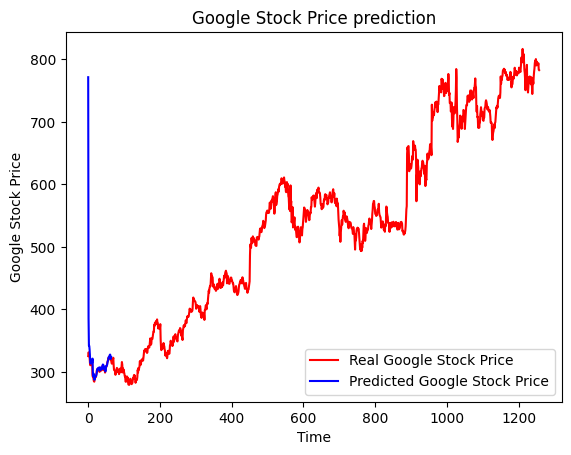

In [34]:
x_test = []
for i in range(timesteps, 70):
    if len(inputs[i-timesteps:i, 0]) == timesteps:
        x_test.append(inputs[i-timesteps:i, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
predicte_stock_price = regressor.predict(x_test)
predicte_stock_price = scaler.inverse_transform(predicte_stock_price)

# visualising the results
plt.plot(real_stock_price, color = "red", label = "Real Google Stock Price")
plt.plot(predicte_stock_price, color = "blue", label = "Predicted Google Stock Price")
plt.title("Google Stock Price prediction")
plt.xlabel("Time")
plt.ylabel("Google Stock Price")
plt.legend()
plt.show()

In [35]:
print(predicte_stock_price)

[[771.4349 ]
 [385.81143]
 [341.6283 ]
 [341.6052 ]
 [334.7052 ]
 [323.56116]
 [315.6009 ]
 [313.2511 ]
 [318.22314]
 [315.1569 ]
 [316.44202]
 [314.06595]
 [321.22067]
 [296.35992]
 [292.706  ]
 [297.14474]
 [292.77744]
 [287.4654 ]
 [287.55896]
 [291.37048]
 [293.35825]
 [293.2901 ]
 [292.97525]
 [296.0864 ]
 [298.53952]
 [304.1862 ]
 [304.73734]
 [305.7567 ]
 [304.08212]
 [305.67285]
 [306.73572]
 [307.2452 ]
 [301.95087]
 [303.02438]
 [303.50702]
 [307.11725]
 [304.34567]
 [303.85965]
 [304.08716]
 [305.99673]
 [310.22928]
 [311.8124 ]
 [310.97025]
 [310.2487 ]
 [304.4875 ]
 [305.24646]
 [306.86353]
 [305.23123]
 [300.63284]
 [305.23926]
 [309.19968]
 [308.8655 ]
 [310.3877 ]
 [311.9715 ]
 [315.93433]
 [317.8523 ]
 [319.4329 ]
 [323.6765 ]
 [322.95615]
 [323.5769 ]
 [326.81195]
 [327.70316]
 [326.32278]
 [320.67493]
 [323.55594]]
